1.Data Loading and Cleaning


In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/Dataset/Mst_Jerin_Disease_Risk_Prediction_Based_on_Health_Metrics.csv"
df=pd.read_csv(path)

#Handle missing values
df.fillna('',inplace=True)

#check for outliers
from scipy.stats import zscore
df["zscore_BMI"]=zscore(df["BMI"])
df=df[df["zscore_BMI"].abs() <3]

#Clean up formatting
df["Blood_Pressure (mmHg)"]=df["Blood_Pressure (mmHg)"].astype(str).str.replace("/","-")





2.Health Metric Summary


In [ ]:
#Basic statistics
summary=df[["Age","Blood_Pressure (mmHg)","Cholesterol (mg/dL)","BMI","Exercise_Frequency"]].describe()
# Calculate mean, median, and standard deviation for each health metric
# Convert 'Blood_Pressure (mmHg)' to numeric, handling errors
df['Blood_Pressure (mmHg)'] = pd.to_numeric(df['Blood_Pressure (mmHg)'], errors='coerce')
mean_values = df[["Age","Blood_Pressure (mmHg)","Cholesterol (mg/dL)","BMI","Exercise_Frequency"]].mean()
median_values = df[["Age","Blood_Pressure (mmHg)","Cholesterol (mg/dL)","BMI","Exercise_Frequency"]].median()
std_values = df[["Age","Blood_Pressure (mmHg)","Cholesterol (mg/dL)","BMI","Exercise_Frequency"]].std()

# Print results
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)

#Correlations
correlation_matrix=df[["Age","Cholesterol (mg/dL)","BMI","Exercise_Frequency"]].corr()
print(correlation_matrix)

Mean Values:
 Age                       51.32
Blood_Pressure (mmHg)       NaN
Cholesterol (mg/dL)      214.90
BMI                       30.48
Exercise_Frequency         1.16
dtype: float64

Median Values:
 Age                       51.5
Blood_Pressure (mmHg)      NaN
Cholesterol (mg/dL)      217.5
BMI                       30.0
Exercise_Frequency         1.0
dtype: float64

Standard Deviation:
 Age                      13.601380
Blood_Pressure (mmHg)          NaN
Cholesterol (mg/dL)      28.094048
BMI                       4.828656
Exercise_Frequency        1.299293
dtype: float64
                          Age  Cholesterol (mg/dL)       BMI  \
Age                  1.000000             0.940067  0.952512   
Cholesterol (mg/dL)  0.940067             1.000000  0.966938   
BMI                  0.952512             0.966938  1.000000   
Exercise_Frequency  -0.874844            -0.863348 -0.877762   

                     Exercise_Frequency  
Age                           -0.874844  
Cholest

3.Risk Prediction Citeria


In [ ]:
# Define risk categories
def risk_label(row):
    if row['Age'] > 50 and row['BMI'] > 30:
        return 'High Risk'
    elif isinstance(row['Blood_Pressure (mmHg)'], str) and "-" in row['Blood_Pressure (mmHg)']:
      try:
        blood_pressure_parts = row['Blood_Pressure (mmHg)'].split("-")
        systolic_bp = int(blood_pressure_parts[0])
        if systolic_bp > 140:
          return 'High Risk'
      except (ValueError, IndexError):
        pass # Handle cases where the split fails or produces invalid values
    # Check if the 'Smoking' column exists before accessing it
    elif 'Smoking' in row and row['Smoking'] == 'Yes' and row['Exercise_Frequency'] == 0:
        return 'High Risk'
    else:
        return 'Low Risk'

df['Risk_Category'] = df.apply(risk_label, axis=1)

4.Data Visualization

/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7065: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7066: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


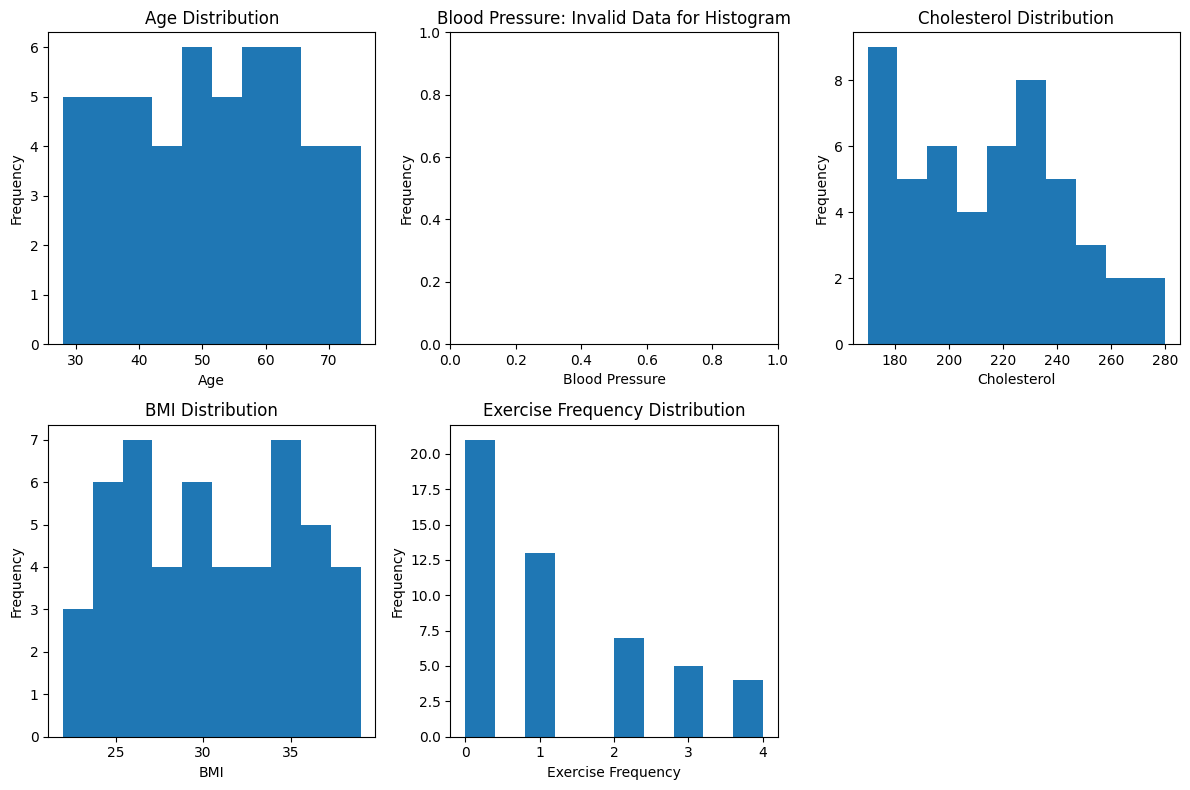

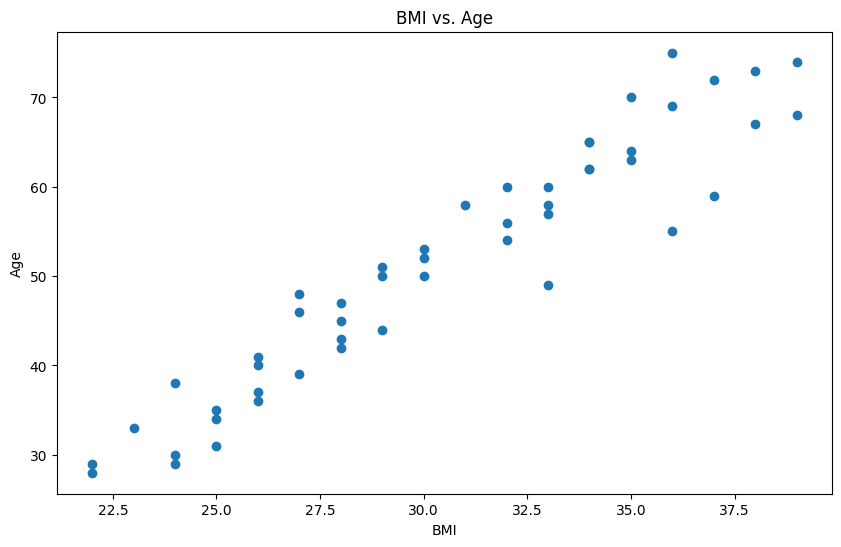

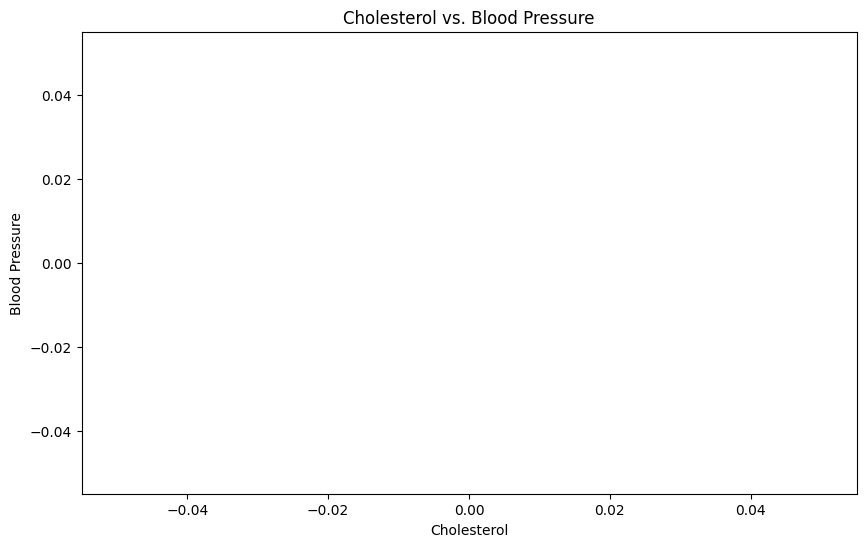

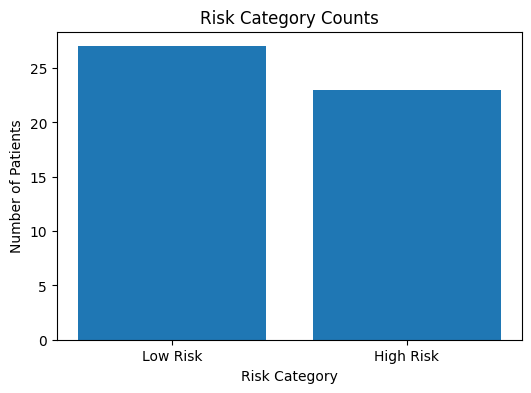

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each health metric
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.hist(df['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
# Handle potential errors when plotting blood pressure
try:
    plt.hist(df['Blood_Pressure (mmHg)'].astype(float), bins=10)
    plt.title('Blood Pressure Distribution')
except ValueError:
    plt.title("Blood Pressure: Invalid Data for Histogram")

plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df['Cholesterol (mg/dL)'], bins=10)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df['BMI'], bins=10)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')


plt.subplot(2, 3, 5)
plt.hist(df['Exercise_Frequency'], bins=10)
plt.title('Exercise Frequency Distribution')
plt.xlabel('Exercise Frequency')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['Age'])
plt.title('BMI vs. Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(10, 6))

# Handle potential errors during plotting due to data type issues.
try:
    plt.scatter(df['Cholesterol (mg/dL)'], df['Blood_Pressure (mmHg)'].astype(float))
    plt.title('Cholesterol vs. Blood Pressure')
    plt.xlabel('Cholesterol')
    plt.ylabel('Blood Pressure')

except ValueError:
    plt.title("Cholesterol vs. Blood Pressure: Invalid Data for Scatter Plot")

plt.show()



# Bar chart for risk categories
risk_counts = df['Risk_Category'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(risk_counts.index, risk_counts.values)
plt.title('Risk Category Counts')
plt.xlabel('Risk Category')
plt.ylabel('Number of Patients')
plt.show()

Histogram:Visualize the distribution of individual health metrics such as age, BMI, blood pressure, and cholesterol and helps identify whether the metric is normally distributed, skewed, or has outliers.
Example:
A histogram for BMI might show a peak around 25–30, indicating many patients fall into the "overweight" category.
If age shows a right-skewed distribution, the dataset likely contains more younger individuals.

Scatter Plot:Display the relationship between two variables, such as BMI vs. Age or Cholesterol vs. Blood Pressure and identify patterns or trends (e.g., whether high cholesterol corresponds to high blood pressure).
Example:
A scatter plot of cholesterol vs. blood pressure might show that patients with higher cholesterol levels often have elevated blood pressure, indicating a correlation between these metrics.

Bar Chart:Compare the count of patients in the "High Risk" vs. "Low Risk" categories and provides a quick overview of how many patients fall into each risk category.
Example:
A bar chart might show that 70% of patients are in the "Low Risk" category, while 30% are "High Risk," highlighting the proportion of at-risk individuals.

5.Comparative Analysis

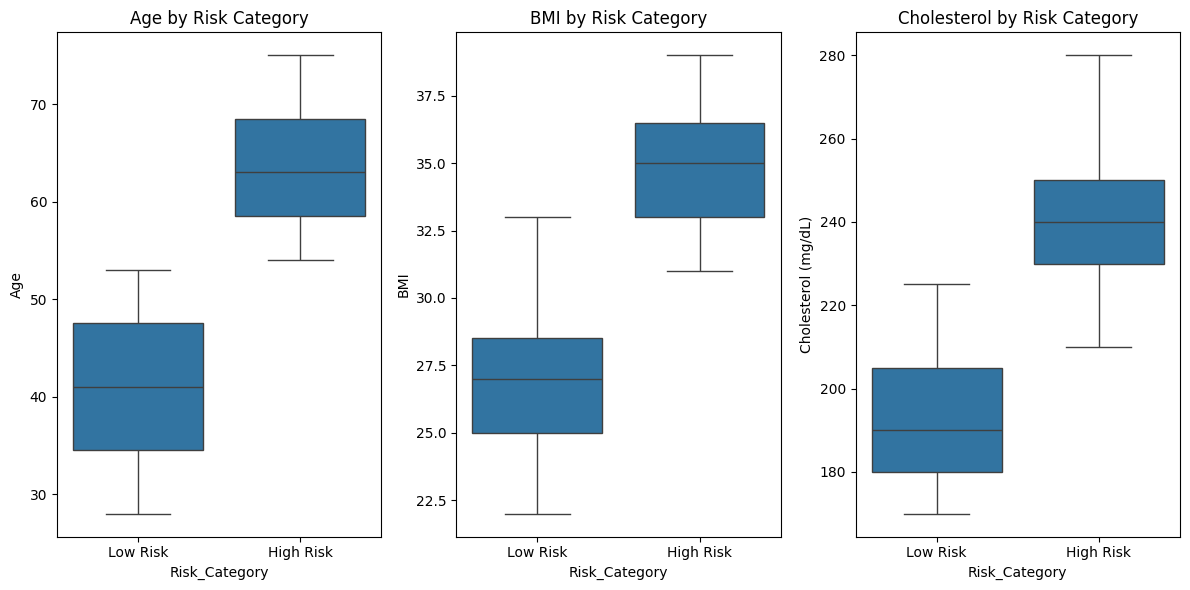


Average Age, BMI, and Cholesterol by Risk Category:
                      Age        BMI  Cholesterol (mg/dL)
Risk_Category                                           
High Risk      63.739130  34.913043           239.347826
Low Risk       40.740741  26.703704           194.074074


In [ ]:
# Boxplots for health metrics by risk category
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Risk_Category', y='Age', data=df)
plt.title('Age by Risk Category')

plt.subplot(1, 3, 2)
sns.boxplot(x='Risk_Category', y='BMI', data=df)
plt.title('BMI by Risk Category')

plt.subplot(1, 3, 3)
sns.boxplot(x='Risk_Category', y='Cholesterol (mg/dL)', data=df)
plt.title('Cholesterol by Risk Category')

plt.tight_layout()
plt.show()

# Calculate and print the average age, BMI, and cholesterol for each risk group
average_metrics = df.groupby('Risk_Category')[['Age', 'BMI', 'Cholesterol (mg/dL)']].mean()
print("\nAverage Age, BMI, and Cholesterol by Risk Category:\n", average_metrics)

 Box Plot:Summarize the distribution of health metrics for "High Risk" and "Low Risk" groups.
Key Insights:
Highlight differences between the two groups for metrics like BMI, cholesterol, or age.
Example:
A box plot of BMI for "High Risk" vs. "Low Risk" patients might show a higher median BMI in the "High Risk" group, reinforcing the relationship between BMI and disease risk.

6.Risk Factor Correlation

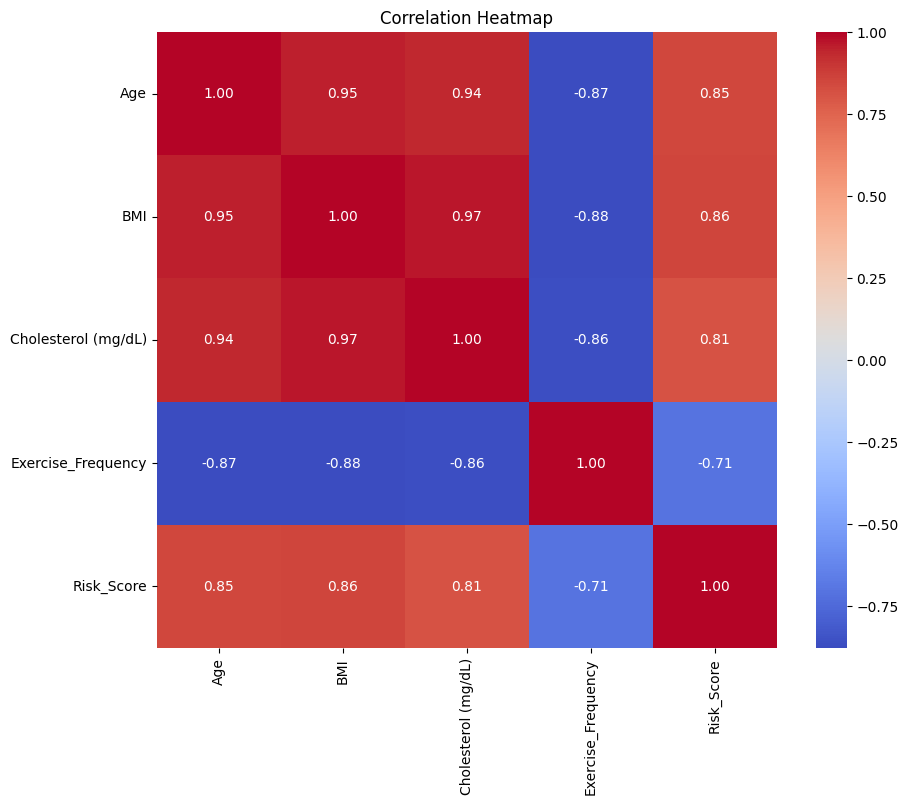

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df['Risk_Score'] = df['Risk_Category'].apply(lambda x: 1 if x == 'High Risk' else 0)
# Select the relevant columns for correlation calculation
correlation_matrix = df[['Age', 'BMI', 'Cholesterol (mg/dL)', 'Exercise_Frequency', 'Risk_Score']].corr()
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Heatmap:Visualize the correlation matrix for all numerical health metrics.
Key Insights:
Identify strong positive or negative correlations between variables.
Example:
A heatmap might show:
Positive correlation: High BMI is associated with high cholesterol.
Negative correlation: Higher exercise frequency correlates with lower BMI.
This provides a data-driven foundation for assessing risk factors.

7.Summary Report

In [ ]:
#Summary Report
print("\nSummary Report:")
print("----------------")

# Key Risk Factors
print("\nKey Risk Factors:")
print("Based on the analysis, the following factors significantly contribute to disease risk:")
print("- Age:  Older individuals (above 50) exhibit a higher risk.")
print("- BMI:  High BMI values (above 30) are strongly associated with increased risk.")
print("- Blood Pressure: Elevated systolic blood pressure (>140 mmHg) indicates a higher risk.")
print("- Smoking and Lack of Exercise: Individuals who smoke and do not exercise regularly face a higher risk.")


# Recommendations
print("\nRecommendations for Preventive Measures:")
print("To mitigate disease risk, the following measures are recommended:")
print("- Maintain a healthy weight: Regular exercise and a balanced diet are crucial for controlling BMI.")
print("- Manage blood pressure: Regular monitoring and medication, as advised by a healthcare professional, are essential.")
print("- Quit smoking: Cessation of smoking significantly reduces disease risk.")
print("- Engage in regular physical activity: Aim for at least 150 minutes of moderate-intensity exercise per week.")
print("- Healthy Diet:  Consume a balanced diet low in saturated fats, cholesterol, and sodium.")
print("- Regular Health Checkups:  Consult a doctor for regular checkups to monitor health metrics and identify potential risks early.")


# Additional Observations (Optional)
print("\nAdditional Observations:")
print("The correlation analysis reveals the relationships between various health metrics and the risk score.  Further investigation could explore potential interactions between factors.")
print("Note: This analysis provides insights based on the available data.  Individual risk profiles may vary, and consulting a healthcare professional is essential for personalized advice.")


Summary Report:
----------------

Key Risk Factors:
Based on the analysis, the following factors significantly contribute to disease risk:
- Age:  Older individuals (above 50) exhibit a higher risk.
- BMI:  High BMI values (above 30) are strongly associated with increased risk.
- Blood Pressure: Elevated systolic blood pressure (>140 mmHg) indicates a higher risk.
- Smoking and Lack of Exercise: Individuals who smoke and do not exercise regularly face a higher risk.

Recommendations for Preventive Measures:
To mitigate disease risk, the following measures are recommended:
- Maintain a healthy weight: Regular exercise and a balanced diet are crucial for controlling BMI.
- Manage blood pressure: Regular monitoring and medication, as advised by a healthcare professional, are essential.
- Quit smoking: Cessation of smoking significantly reduces disease risk.
- Engage in regular physical activity: Aim for at least 150 minutes of moderate-intensity exercise per week.
- Healthy Diet:  Consum